In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [2]:
data=pdr.get_data_yahoo('CIPLA.NS',start='2017-04-03',end='2023-01-18')
data=data.reset_index()
stock=data["Close"]
returns=stock.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prices')

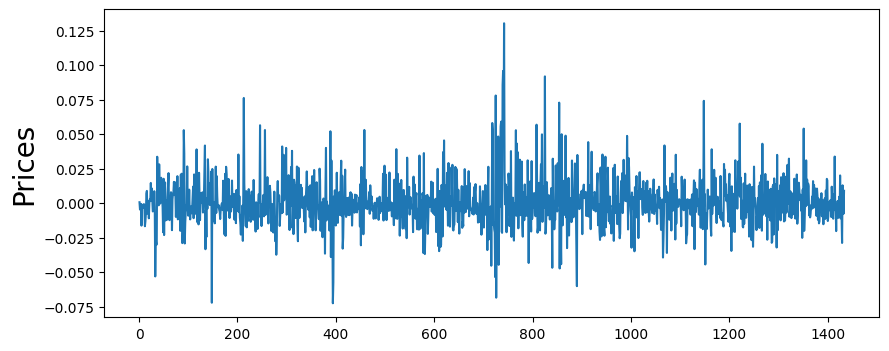

In [3]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Prices', fontsize=20)

In [6]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [7]:
train_size = int(len(returns) * 0.8)
train_data, test_data = returns[:train_size], returns[train_size:]

C:\Users\chakr\AppData\Local\Temp\ipykernel_10780\2498301797.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data, test_data = returns[:train_size], returns[train_size:]


In [8]:
model = auto_arima(train_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True)

In [19]:
print(model.summary())
print(model.order)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1146
Model:                        SARIMAX   Log Likelihood                2977.326
Date:                Tue, 15 Aug 2023   AIC                          -5952.652
Time:                        11:10:54   BIC                          -5947.608
Sample:                             0   HQIC                         -5950.748
                               - 1146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   6.97e-06     46.557      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):              1588.79
Prob(Q):                              0.32   Pr

In [11]:
forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
forecast_series = pd.Series(forecast, index=test_data.index)

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
forecast_series.tail(5)

1429    0.0
1430    0.0
1431    0.0
1432    0.0
1433    NaN
dtype: float64

In [15]:
mse = mean_squared_error(test_data, forecast_series)
print("Mean Squared Error:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

ValueError: Found input variables with inconsistent numbers of samples: [287, 286]